# Load, Clean, and Resample Riksbanken Policy Rate Data

This code reads Riksbanken policy rate data from an Excel file, removes unnecessary columns, and resamples the time series to monthly frequency. The cleaned data is then saved to an Excel file. Additionally, the code filters the policy rate data for a specified time period, displaying and saving the results.

Source: https://www.riksbank.se/sv/statistik/sok-rantor--valutakurser/styrranta-in--och-utlaningsranta/

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read Excel file containing Riksbanken policy rate data
styr = pd.read_excel('Styrränta.xlsx', header=0)

In [3]:
styr

,Unnamed: 0,Riksbankens styrränta,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1994-06-01,6.95,NaN,NaN,NaN
1,1994-06-02,6.95,NaN,NaN,NaN
2,1994-06-03,6.95,NaN,NaN,NaN
3,1994-06-06,6.95,NaN,NaN,NaN
4,1994-06-07,6.95,NaN,NaN,NaN
...,...,...,...,...,...
7362,2023-09-21,3.75,NaN,NaN,NaN
7363,2023-09-22,3.75,NaN,NaN,NaN
7364,2023-09-25 00:00:00,3.75,NaN,NaN,NaN
7365,2023-09-26 00:00:00,3.75,NaN,NaN,NaN


In [4]:
# Drop unnecessary columns
styr.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
styr

,Unnamed: 0,Riksbankens styrränta
0,1994-06-01,6.95
1,1994-06-02,6.95
2,1994-06-03,6.95
3,1994-06-06,6.95
4,1994-06-07,6.95
...,...,...
7362,2023-09-21,3.75
7363,2023-09-22,3.75
7364,2023-09-25 00:00:00,3.75
7365,2023-09-26 00:00:00,3.75


In [5]:
# Rename the column 'Unnamed: 0' to 'Dates'
df = styr.rename(columns={'Unnamed: 0': 'Dates'})
df

,Dates,Riksbankens styrränta
0,1994-06-01,6.95
1,1994-06-02,6.95
2,1994-06-03,6.95
3,1994-06-06,6.95
4,1994-06-07,6.95
...,...,...
7362,2023-09-21,3.75
7363,2023-09-22,3.75
7364,2023-09-25 00:00:00,3.75
7365,2023-09-26 00:00:00,3.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7367 entries, 0 to 7366
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dates                  7367 non-null   object 
 1   Riksbankens styrränta  7367 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.2+ KB


In [7]:
# Assuming 'df' is your DataFrame
df['Dates'] = pd.to_datetime(df['Dates'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7367 entries, 0 to 7366
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Dates                  7367 non-null   datetime64[ns]
 1   Riksbankens styrränta  7367 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 115.2 KB


In [8]:
# Set the 'Dates' column as the index
df.set_index('Dates', inplace=True)
df

,Riksbankens styrränta
Dates,
1994-06-01,6.95
1994-06-02,6.95
1994-06-03,6.95
1994-06-06,6.95
1994-06-07,6.95
...,...
2023-09-21,3.75
2023-09-22,3.75
2023-09-25,3.75


In [9]:
# Group the data by month and calculate the monthly average
df = df.resample('MS').nearest()

In [10]:
df

,Riksbankens styrränta
Dates,
1994-06-01,6.95
1994-07-01,6.92
1994-08-01,6.92
1994-09-01,7.20
1994-10-01,7.20
...,...
2023-05-01,3.00
2023-06-01,3.50
2023-07-01,3.50


In [11]:
# Filtering Data
start_date = "2000-01-01"
end_date = "2023-09-01"

filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]


In [12]:
filtered_df

,Riksbankens styrränta
Dates,
2000-01-01,3.25
2000-02-01,3.25
2000-03-01,3.75
2000-04-01,3.75
2000-05-01,3.75
...,...
2023-05-01,3.00
2023-06-01,3.50
2023-07-01,3.50


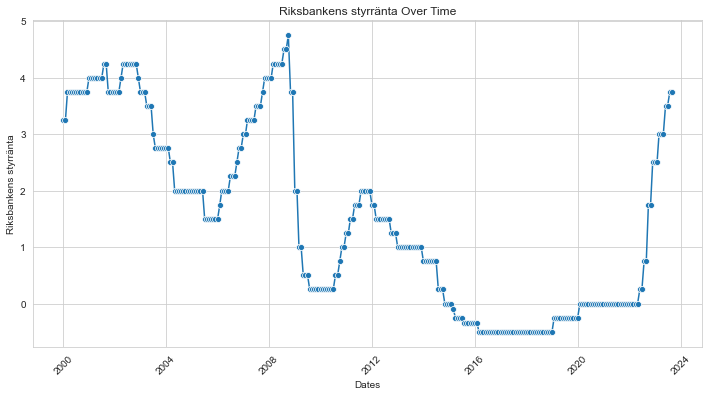

In [13]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Dates', y='Riksbankens styrränta', marker='o')

# Set labels and title
plt.xlabel('Dates')
plt.ylabel('Riksbankens styrränta')
plt.title('Riksbankens styrränta Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


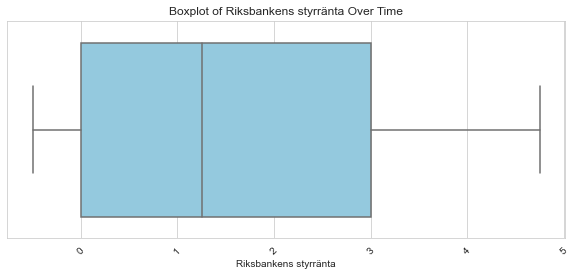

In [18]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=filtered_df, x='Riksbankens styrränta', color='skyblue', )

# Set labels and title
plt.title('Boxplot of Riksbankens styrränta Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Save the filtered data to an Excel file
filtered_df.to_excel('policyrate.xlsx', index=True)
